# Titanic Survival Prediction

## Importation

Importing Libraries

In [ ]:
# Data Wrangling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
import sklearn.preprocessing as skpp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Warnings
warnings.filterwarnings('ignore')

Importing Dataset

In [ ]:
data = pd.read_csv("Titanic-Dataset.csv")

## Understanding

First things first, lets take a look at our data

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We use ".shape" to further understand the dataset, here we can see that it has 891 records (rows) while having 12 fields (collumns)

In [ ]:
data.shape

(891, 12)

Now for the ".describe()" so we are able too an overmal mathematical summary of all our numerical values in our dataset.

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can also see whether or not theres something missing here. There are 714 counts in age, but there are consistent 891 counts in other collums? What does it mean? It means that this field, Age, has some null values in it.

In [ ]:
# Lets take a look at how much people actually survived overall
data['Survived'].value_counts()

,count
Survived,
0,549
1,342


We see now that there are 342 survivors and 549 deaths in the Titanic accident. But surely there is a better way to visuallize this right? Well there is and its as follows

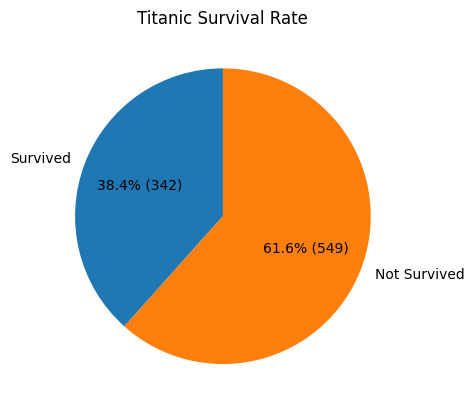

In [ ]:
# Sample data
labels = ['Survived', 'Not Survived']
sizes = [342, 549]

# Create the pie chart
plt.pie(sizes, labels=labels, autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p * sum(sizes) / 100), startangle=90)

# Add a title
plt.title('Titanic Survival Rate')

# Display the chart
plt.show()

Now this is much more better, we can better visualize it overall now. In regards to the accident, how many survived and how many died in terms of percentages while giving a visual aid to help ourselves more. <br><br> You can also see it as you have a 38.4% chance to survive the Titanic, but this is not the only information we need to see, we need to figure out more information to see what are the actual relevant information that could help increase our chances to survive.



Now, this is for overall / sum of everyone in the tragedy, what other information / categories could we use to further understand the accident?

Mmmm from what I see right now, we should figure out the Pclass, sex, and age

Lets start with Pclass

In [ ]:
# To see how many people there were each class
data['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


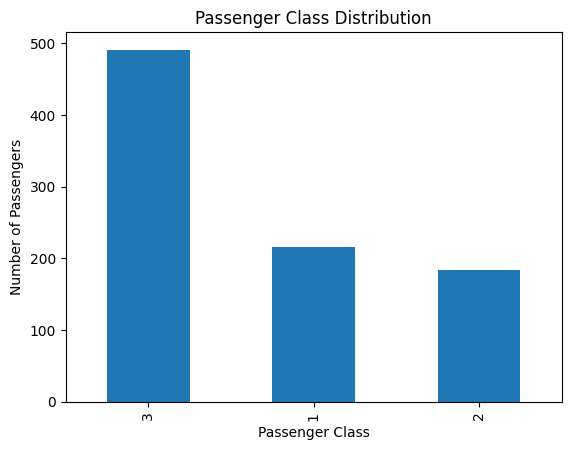

In [ ]:
# Same as above but in a more visual expressive way
passenger_class_counts = data['Pclass'].value_counts()
passenger_class_counts.plot(kind='bar',
                            xlabel='Passenger Class',
                            ylabel='Number of Passengers',
                            title='Passenger Class Distribution')
plt.show()

We now see how many there were, and who outnumbered who? With 3rd class being highest and 2nd the lowest amount of people

<Axes: xlabel='Survived', ylabel='count'>

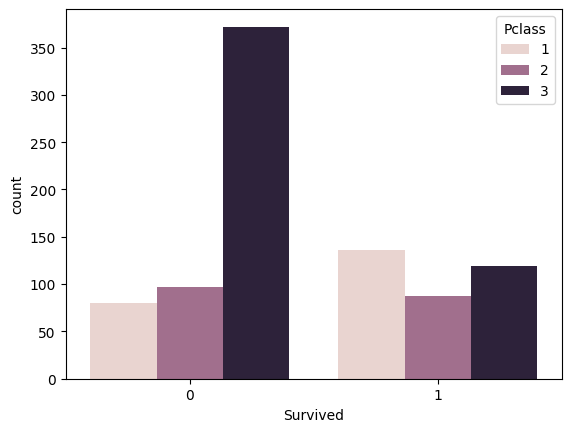

In [ ]:
# Lets see now how many survived and didn't per passenger class
sns.countplot(x=data['Survived'], hue=data['Pclass'])

Theres only three types of passengers there, 1st, 2nd, and 3rd class. From highest class to the lowest class. <br><br> 0 dictates how many died and 1 dictates how many lived <br><br> From this we can see that a huge number of 3rd class passengers compared to both 1st and 2nd, we can also see here that the higher your passenger class is, the more likely you are to actually survive this tragedy too!

Lets move on to the sex now, does it matter in predicting the survival rates?

In [ ]:
# Lets see the amount per sex
data['Sex'].value_counts()

,count
Sex,
male,577
female,314


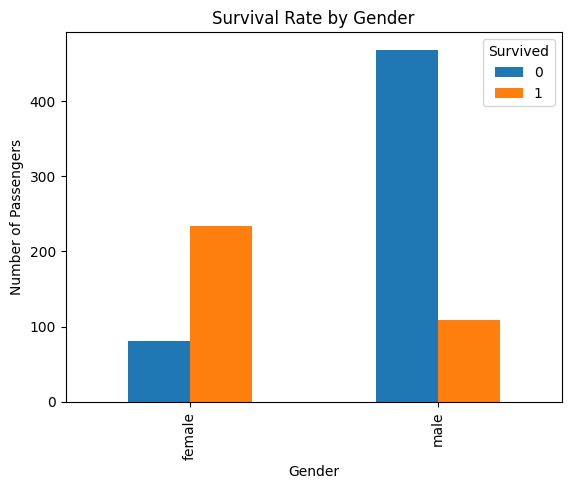

In [ ]:
pd.crosstab(data['Sex'], data['Survived'])

pd.crosstab(data['Sex'], data['Survived']).plot(kind='bar',
                                               title='Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.show()

We see here that you are more likely to survive as a female than as a male, the most common idea to it from my understanding is from the chivalry of men back in the day, ready to lay their life down for women, children, and the elderly back in the days

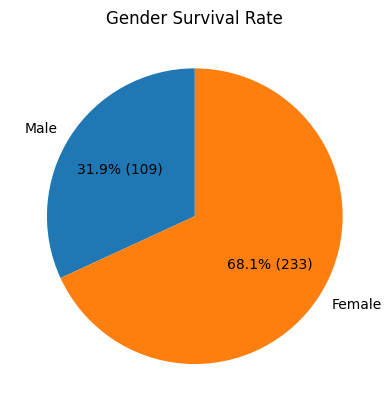

In [ ]:
# Filter data for survived males and females
male_survived = data[(data['Sex'] == 'male') & (data['Survived'] == 1)].shape[0]
female_survived = data[(data['Sex'] == 'female') & (data['Survived'] == 1)].shape[0]

# Sample data - Updated
labels = ['Male', 'Female']
sizes = [male_survived, female_survived]

# Create the pie chart
plt.pie(sizes, labels=labels, autopct=lambda p: '{:.1f}% ({:.0f})'.format(p, p * sum(sizes) / 100), startangle=90)

# Add a title
plt.title('Gender Survival Rate')

# Display the chart
plt.show()

This is the summary of how many survived for male and female

Now lets see age

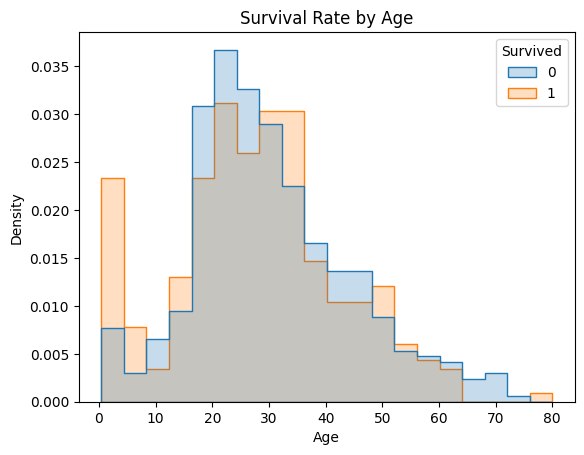

In [ ]:
sns.histplot(data=data, x='Age', hue='Survived', element='step', stat='density', common_norm=False)

plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

The age histogram reveals a complex relationship with survival on the Titanic. Younger passengers, especially children, had higher survival rates, likely due to rescue prioritization.

Survival chances decreased with increasing age, with a dip for young adults, then a slight improvement for older adults, though this observation is based on a smaller sample.

Essentially, younger age generally increased the odds of survival, but variations existed within different age groups.

## Cleaning

Lets also transform our gender field to a numeric one so we will have an easier time

*   0 for female
*   1 for male



In [ ]:
data['Sex'].unique()

sex_values = np.array(['male', 'female'], dtype=object)

le = skpp.LabelEncoder()
data['Sex'] = preprocessing.fit_transform(data['Sex'])

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Lets confirm if there are actually null values per field
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


I want to keep the Age field and not drop it, but because there are so many null values in it I can not really ignore it?

What I will do is simply add the median in the missing records to fill in the gap

In [ ]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [ ]:
# Lets confirm what we did worked
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Bam! No more missing values

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


## Model Training

For our data modelling, we will only be needing our Sex, Pclass, and Survived fields. This is what I will base my survival prediction on <br><br> We will also be using LogisticRegression

In [170]:
# Feature Selection / What fields we will use for our model
X = data[['Sex', 'Pclass', 'Age']]
y = data['Survived']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model Training
log = LogisticRegression(random_state=0)
log.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Model Prediction

In [ ]:
pred = print(log.predict(X_test))

[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


To check if what we put is correct, we compare the numbers of x_test to y_test

In [ ]:
print(y_test)

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64


In [172]:
# To see if a specific person can survive by our model we can do this, though keep in mind we can only check it by a persons Sex, Pclass, and Age

res = log.predict([[3, 0, 26]]) # We change the values here, if we want to test for a specific something

if res == 0:
    print("Survived")
else:
    print("Not Survived")

Survived


## Model Testing

To test the accuracy of our model we will be using the accuracy_score and confusio_matrix

In [169]:
# Accuracy Score

y_pred = log.predict(X_test)  # Get predictions for the test data
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy

print(f"Accuracy: {accuracy}")

Accuracy: 0.8100558659217877


The model I created has a 81.01% chance of being correct when predicting whether or not a person will survive the titanic based solely on the sex and passenger class

In [ ]:
# Confusion Matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[94 16]
 [18 51]]


The confusion matrix summarizes the prediction results of our model, comparing predicted survival outcomes with actual outcomes to reveal where my model is accurate and where it makes mistakes <br><br>

94 (Top-left): Correctly predicted 94 passengers would not survive.

16 (Top-right): Incorrectly predicted 16 passengers would survive (they didn't).

18 (Bottom-left): Incorrectly predicted 18 passengers would not survive (they did).

51 (Bottom-right): Correctly predicted 51 passengers would survive.